In [1]:
# import library
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt

import pymoo
from pymoo.model.problem import Problem

import pandas as pd


import joblib

import seaborn as sns

In [19]:
## amorphous와 ferrite의 비교

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

read_data1 = pd.read_csv("../result/result_0614_F111_N3000_amorphous.csv")
read_data2 = pd.read_csv("../result/result_0615_F111_N3000_amorphous.csv")
read_data3 = pd.read_csv("../result/result_0617_F111_N3000_amorphous.csv")
read_data4 = pd.read_csv("../result/result_0620_F111_N3000_amorphous.csv")

read_data1.head()

,Unnamed: 0,N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,move_z1,move_z2,offset_z1,offset_z2,V,B,Lmt,Llt,w,l,h,total_loss,copperloss_tx,copperloss_rx,copperloss,coreloss
0,42,9.0,31.0,18.0,100.0,64.0,3500.0,23.0,23.0,9.0,9.0,3.0,4.0,2.0,2.0,0.0,0.0,1372.00,0.547207,501.409744,31.829648,80.0,171.5,100.0,211.159203,99.498492,68.467533,167.966025,43.193178
1,59,9.0,31.0,18.0,99.0,64.0,3500.0,23.0,23.0,9.0,9.0,3.0,4.0,2.0,2.0,0.0,0.0,1364.00,0.547207,509.717266,31.804013,80.0,170.5,100.0,211.867872,99.546593,69.128101,168.674694,43.193178
2,88,9.0,31.0,17.0,96.0,55.0,3500.0,23.0,23.0,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1178.36,0.579396,584.510096,31.939683,80.0,165.5,89.0,226.705876,112.926722,73.676362,186.603084,40.102793
3,71,9.0,31.0,17.0,95.0,55.0,3500.0,23.0,23.0,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1171.24,0.579396,596.872788,31.929012,80.0,164.5,89.0,226.915046,112.978546,73.833707,186.812253,40.102793
4,10,9.0,32.0,18.0,100.0,64.0,3500.0,23.0,23.0,9.0,10.0,3.0,4.0,2.0,2.0,0.0,0.0,1397.25,0.530107,531.409270,31.813034,81.0,172.5,100.0,209.941005,99.355389,68.395392,167.750781,42.190224


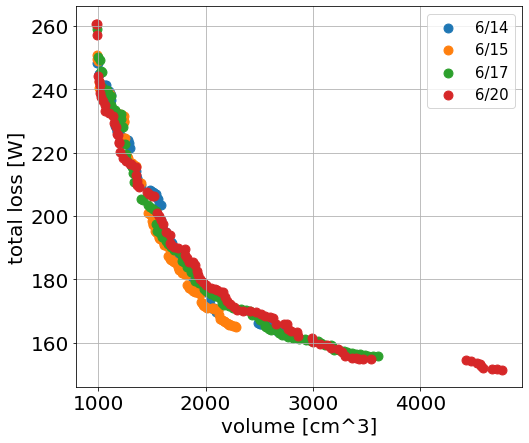

In [29]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["total_loss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["total_loss"] ,s=80)
plt.scatter(read_data3["V"], read_data3["total_loss"] ,s=80)
plt.scatter(read_data4["V"], read_data4["total_loss"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("total loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["6/14","6/15","6/17","6/20","N10000"], fontsize=15)

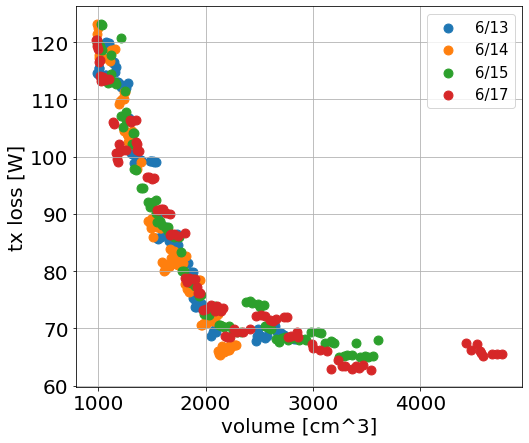

In [21]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["copperloss_tx"] ,s=80)
plt.scatter(read_data2["V"], read_data2["copperloss_tx"] ,s=80)
plt.scatter(read_data3["V"], read_data3["copperloss_tx"] ,s=80)
plt.scatter(read_data4["V"], read_data4["copperloss_tx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("tx loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["6/13","6/14","6/15","6/17","N10000"], fontsize=15)

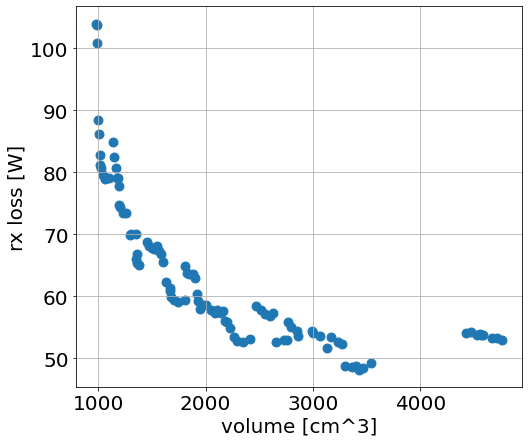

In [26]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

#plt.scatter(read_data1["V"], read_data1["copperloss_rx"] ,s=80)
#plt.scatter(read_data2["V"], read_data2["copperloss_rx"] ,s=80)
#plt.scatter(read_data3["V"], read_data3["copperloss_rx"] ,s=80)
plt.scatter(read_data4["V"], read_data4["copperloss_rx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("rx loss [W]", fontsize=20)
plt.grid(True)
#plt.legend(["6/13","6/14","6/15","6/17","N10000"], fontsize=15)

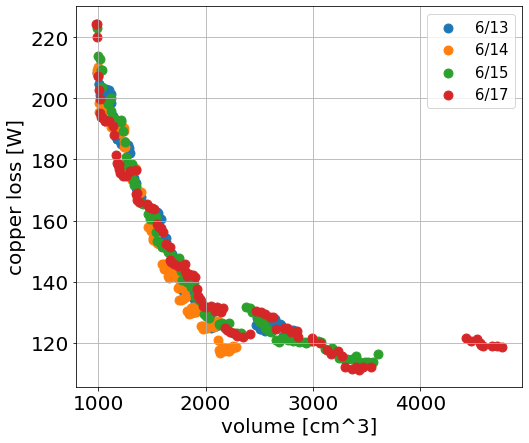

In [23]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["copperloss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["copperloss"] ,s=80)
plt.scatter(read_data3["V"], read_data3["copperloss"] ,s=80)
plt.scatter(read_data4["V"], read_data4["copperloss"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("copper loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["6/13","6/14","6/15","6/17","N10000"], fontsize=15)

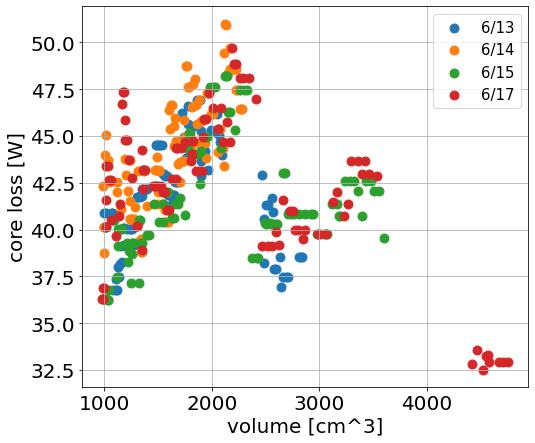

In [24]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["coreloss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["coreloss"] ,s=80)
plt.scatter(read_data3["V"], read_data3["coreloss"] ,s=80)
plt.scatter(read_data4["V"], read_data4["coreloss"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("core loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["6/13","6/14","6/15","6/17","N10000"], fontsize=15)

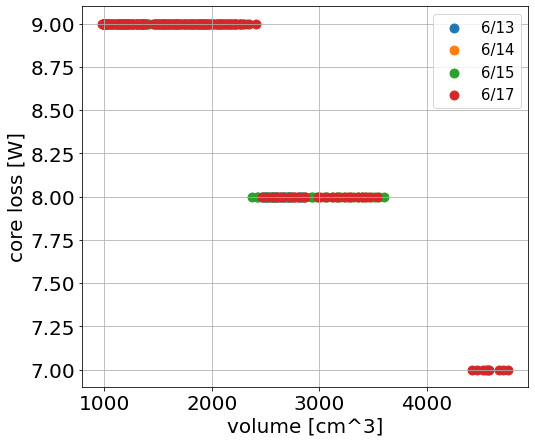

In [25]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["N1"] ,s=80)
plt.scatter(read_data2["V"], read_data2["N1"] ,s=80)
plt.scatter(read_data3["V"], read_data3["N1"] ,s=80)
plt.scatter(read_data4["V"], read_data4["N1"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("core loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["6/13","6/14","6/15","6/17","N10000"], fontsize=15)